# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import os
import shutil
import pandas as pd
import numpy as np
import requests
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 1000

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../dataset_raw/debernardi_2020.csv")
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [4]:
df.describe(include='all')

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590,590,590,590.000000,590,590.000000,199,208,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
unique,590,2,4,NaN,2,NaN,8,52,NaN,NaN,NaN,NaN,NaN,NaN
top,S590,Cohort1,BPTB,NaN,F,NaN,III,Pancreatitis,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,332,409,NaN,299,NaN,76,41,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,59.079661,NaN,2.027119,NaN,NaN,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,NaN,NaN,NaN,13.109520,NaN,0.804873,NaN,NaN,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,NaN,NaN,NaN,26.000000,NaN,1.000000,NaN,NaN,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,NaN,NaN,NaN,50.000000,NaN,1.000000,NaN,NaN,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,NaN,NaN,NaN,60.000000,NaN,2.000000,NaN,NaN,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,NaN,NaN,NaN,69.000000,NaN,3.000000,NaN,NaN,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
drop_cols = ['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']
df.drop(columns=drop_cols, inplace=True)
df.head()

,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,33,F,1,1.83222,0.893219,52.94884,654.282174
1,81,F,1,0.97266,2.037585,94.46703,209.488250
2,51,M,1,0.78039,0.145589,102.36600,461.141000
3,61,M,1,0.70122,0.002805,60.57900,142.950000
4,62,M,1,0.21489,0.000860,65.54000,41.088000


In [8]:
df = pd.get_dummies(df)
df['sex_F'] = df['sex_F'].astype(int)
df['sex_M'] = df['sex_M'].astype(int)
df

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,sex_F,sex_M
0,33,1,1.83222,0.893219,52.948840,654.282174,1,0
1,81,1,0.97266,2.037585,94.467030,209.488250,1,0
2,51,1,0.78039,0.145589,102.366000,461.141000,0,1
3,61,1,0.70122,0.002805,60.579000,142.950000,0,1
4,62,1,0.21489,0.000860,65.540000,41.088000,0,1
...,...,...,...,...,...,...,...,...
585,68,3,0.52026,7.058209,156.241000,525.178000,0,1
586,71,3,0.85956,8.341207,16.915000,245.947000,1,0
587,63,3,1.36851,7.674707,289.701000,537.286000,0,1
588,75,3,1.33458,8.206777,205.930000,722.523000,1,0


In [9]:
numerical_cols = ['age', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
df_no_outliers = df.copy()


Processing column: age


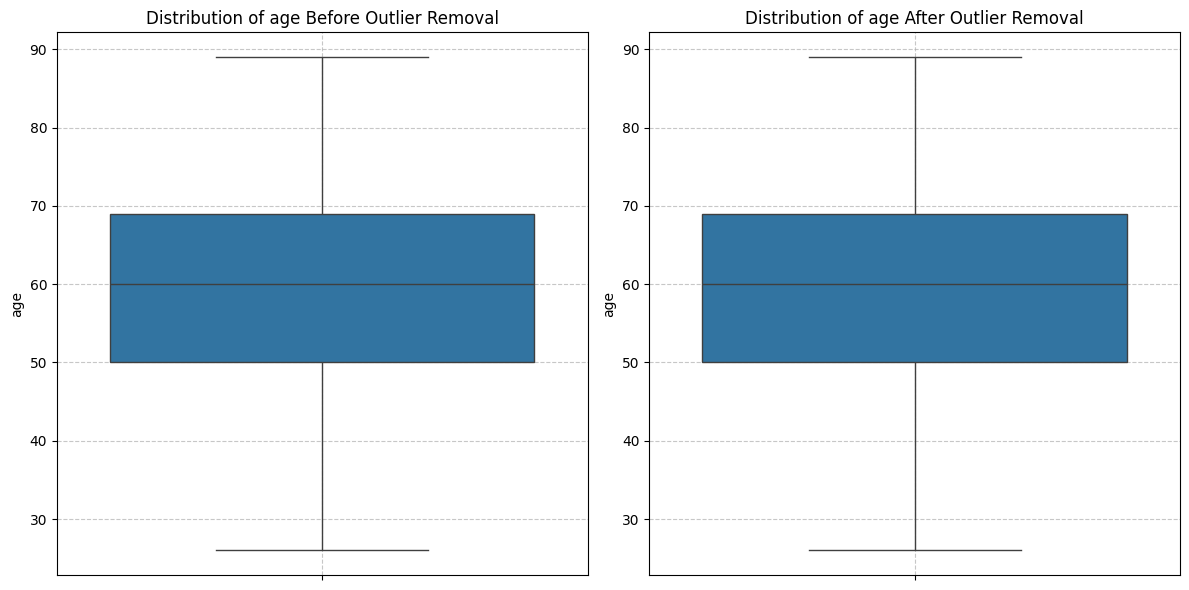


Processing column: creatinine


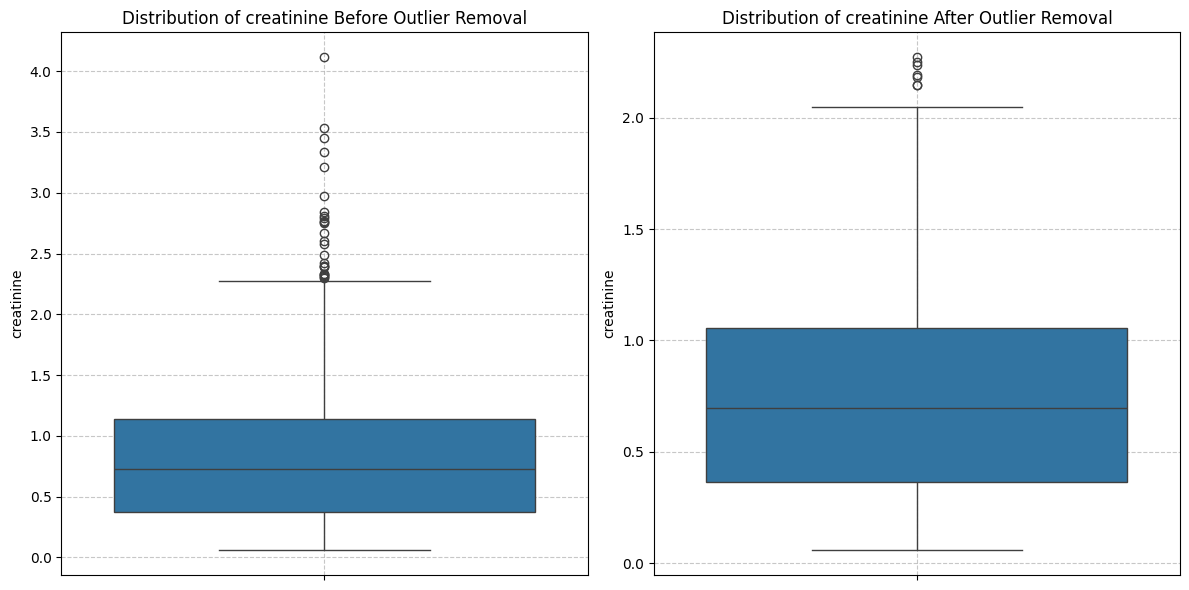


Processing column: LYVE1


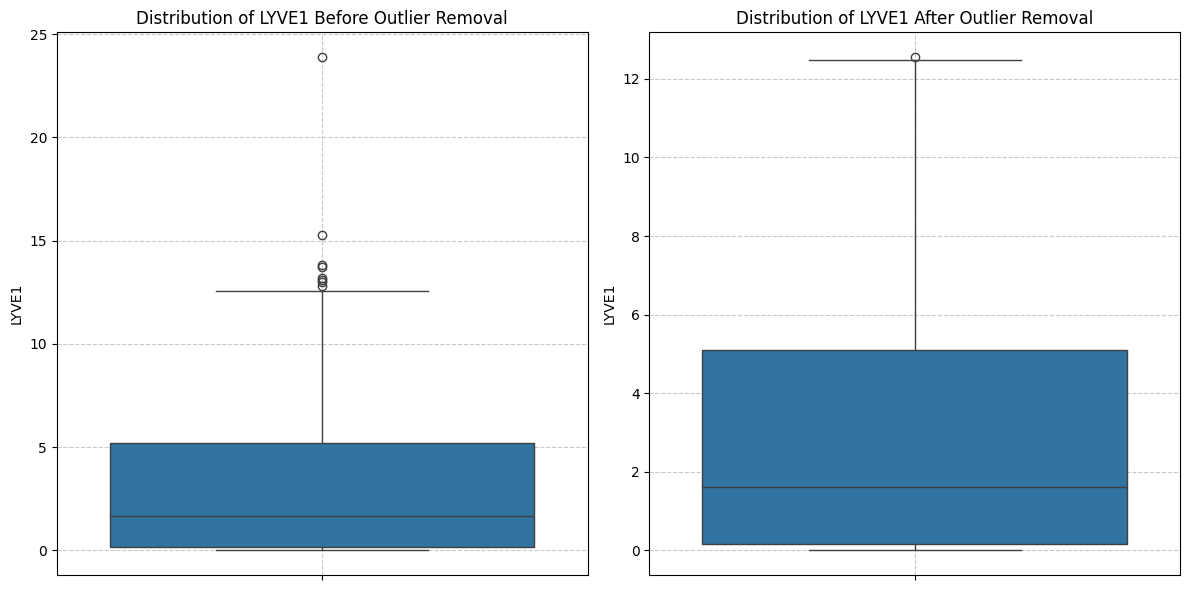


Processing column: REG1B


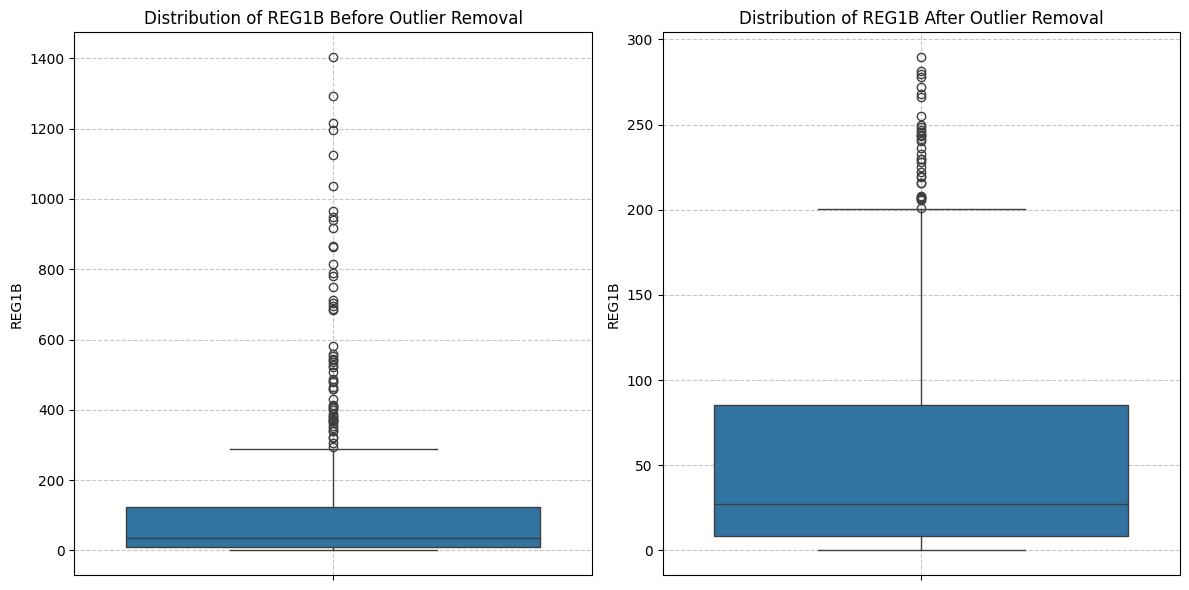


Processing column: TFF1


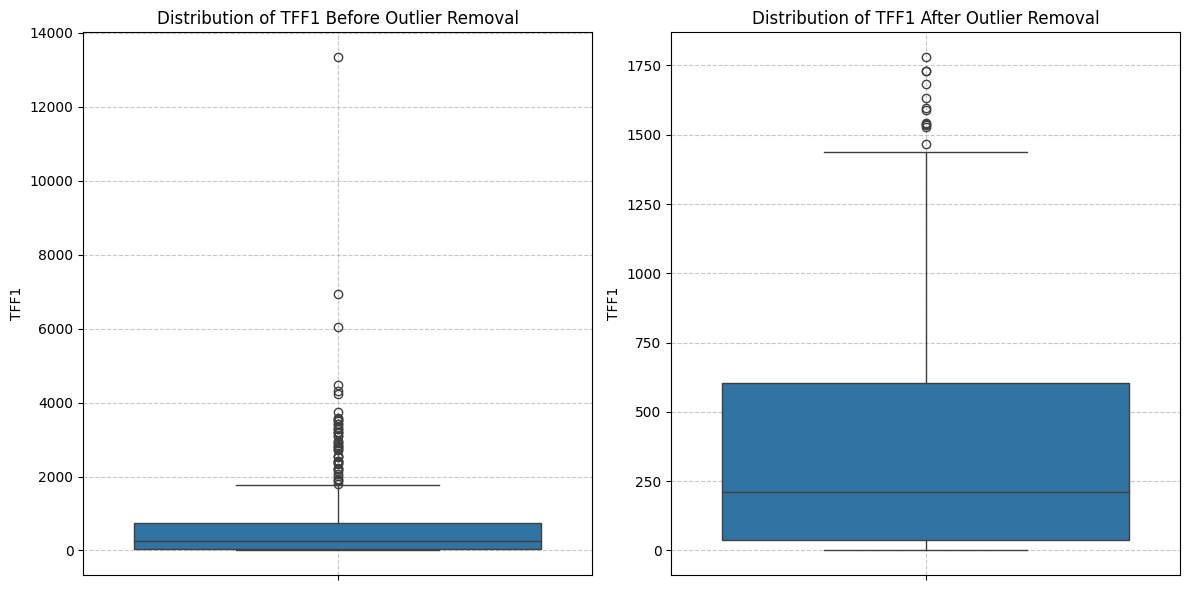

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,sex_F,sex_M
0,33,1,1.83222,0.893219,52.94884,654.282174,1,0
1,81,1,0.97266,2.037585,94.46703,209.488250,1,0
2,51,1,0.78039,0.145589,102.36600,461.141000,0,1
3,61,1,0.70122,0.002805,60.57900,142.950000,0,1
4,62,1,0.21489,0.000860,65.54000,41.088000,0,1
...,...,...,...,...,...,...,...,...
579,78,3,0.46371,1.044345,14.36436,327.397097,1,0
581,61,3,0.32799,5.232527,123.10473,755.820867,1,0
585,68,3,0.52026,7.058209,156.24100,525.178000,0,1
586,71,3,0.85956,8.341207,16.91500,245.947000,1,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

def plot_outliers(df_before, df_after, column):
    plt.figure(figsize=(12, 6))

    # Plot before outlier removal
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.boxplot(y=df_before[column])
    plt.title(f'Distribution of {column} Before Outlier Removal')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plot after outlier removal
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(y=df_after[column])
    plt.title(f'Distribution of {column} After Outlier Removal')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

# Apply outlier removal and plot for each numerical column
for col in numerical_cols:
    print(f"\nProcessing column: {col}")
    df_before_col = df[[col]].copy() # Create a temporary DataFrame for plotting 'before'
    df_no_outliers_col = remove_outliers_iqr(df[[col]].copy(), col) # Apply outlier removal to a copy for this column

    # Plot before and after for the current column
    plot_outliers(df_before_col, df_no_outliers_col, col)

    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]



df_no_outliers

In [11]:
df_model = df_no_outliers.copy()

In [12]:
df_model['diagnosis'] = df_model['diagnosis'].apply(lambda x: 0 if x == 1 else 1)
df_model['diagnosis'].value_counts()

diagnosis
1    298
0    178
Name: count, dtype: int64

In [13]:
df_model

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,sex_F,sex_M
0,33,0,1.83222,0.893219,52.94884,654.282174,1,0
1,81,0,0.97266,2.037585,94.46703,209.488250,1,0
2,51,0,0.78039,0.145589,102.36600,461.141000,0,1
3,61,0,0.70122,0.002805,60.57900,142.950000,0,1
4,62,0,0.21489,0.000860,65.54000,41.088000,0,1
...,...,...,...,...,...,...,...,...
579,78,1,0.46371,1.044345,14.36436,327.397097,1,0
581,61,1,0.32799,5.232527,123.10473,755.820867,1,0
585,68,1,0.52026,7.058209,156.24100,525.178000,0,1
586,71,1,0.85956,8.341207,16.91500,245.947000,1,0
